# Netflix Dataset Analysis

#### The dataset I'm about to analyze contains various info about one of the most popular streaming platform "Netflix". I'll answer some questions regarding the content of this streaming platfrom according to info available on this dataset.
1. How does the amount of content on Netflix grow over the year? What year did Netflix add the most content on its platform? What is the most popular month for Netflix to add new content?

2. What type of content dominates the platform? What kind of genre dominates the most for each type?

3. How does the duration of shows vary? Is there any correlation between duration and genre that dominates?

4. Which (maturity) rating has the most amount on both type of content? Does that reflects Netflix's target audience?

5. Which country has the most content?

6. Which actor/actress shows up most frequently? What about director? Which one shows up most frequently? Is there any correlation between the two (actor and director)? Which actor - director pairing shows up the most?

#### The analysis process will be divided to 2:
   1. Data Preprocessing
   2. Explorary Data Analysis (EDA)

## Importing Library

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.lines as lines
import seaborn as sns
from collections import Counter

## Reading-In Data

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Preprocessing

Before starting EDA, the data needs to be processed/cleaned. By looking at the dataset, this process will include:
1. Straigthen up the dataset (giving columns unique and logical name, removing empty rows, etc).
2. Checking for duplicates and remove them
3. Fixing structural errors such as formatting, spelling error, spaces, etc.
4. Handling missing data
5. Deleting rows that contains a lot of empty value on key information

Since the dataset is relatively small in terms of column amount, this process won't include removing unneeded columns, and since there's no numerical data there won't be any need to check for or remove unwanted outlier.

### 1) Straighten up the dataset

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#Check for whole empty row
empty_row = df.isnull().all(axis=1)
df[empty_row]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


__After a quick check, I decided that one change is needed:__ Changing the 'listed_in' column name to 'genre' for more clarity.

Since there's no whole empty row, no removal action is needed.

In [6]:
df.rename(columns={'listed_in':'genre'}, inplace=True)

In [7]:
df.columns
print("'listed_in' has successfully been changed to 'genre'" )

'listed_in' has successfully been changed to 'genre'


### 2) Checking for duplicates 

In [8]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


### 3) Fixing structural errors

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


##### Looking at the column info, few things catch attention:
    a) The date column isn't 'date' type so that'll be changed first.

    b) Column with single entry such as type, release_year, rating and duration will be cheked if there's any unwanted typo or wrong spacing. 

    c) Checking the more difficult column with multiple entries such as cast, country, director, duration (doesn't really have multiple entries but is a continuous data) and genre. 

    d) Title and description column won't be checked as those 2 columns contain a very unique/specific (and long) entries.

#### a. Fixing column that contains date

First I'll be checking if there're any broken format before changing the whole column to date type. 

This is done by checking suspicious length that differs from others.

In [10]:
date_length = df['date_added'].str.len()
date_length.value_counts()

17.0    1589
16.0    1567
13.0    1452
14.0    1258
15.0    1178
12.0    1040
18.0     439
11.0     272
19.0       2
Name: date_added, dtype: int64

In [11]:
date_len_filt = date_length == 19
df['date_added'].loc[date_len_filt]

7457     September 16, 2018
7729     September 22, 2016
Name: date_added, dtype: object

All good, no broken format found.

Now to actually change this column data type to 'date' type.

In [12]:
df['date_added'] = pd.to_datetime(df['date_added']) 
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
genre                   object
description             object
dtype: object

The 'date_added' column has been succesfully changed to date type.

#### b. Checking the unique value for the column listed above.

In [13]:
check_s_col = ['type', 'release_year', 'rating']
for col_s in check_s_col:
    print(f"{col_s}= {df[col_s].unique()}\n")

type= ['Movie' 'TV Show']

release_year= [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]

rating= ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']



It seems like there's a few mistake inside the rating column. 

74 min, 84 min and 66 min are clearly not rating and are supposed to go into the duration column.

In [14]:
wrong_rating = df['rating'].isin(['74 min', '84 min', '66 min'])
df[wrong_rating].index

Int64Index([5541, 5794, 5813], dtype='int64')

In [15]:
for wr_index in df[wrong_rating].index:
    df.at[wr_index, 'duration'] = df.loc[wr_index, 'rating']
df[wrong_rating]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


Now that the 3 wrong entries have been removed, Changes are also needed for these now missing values. 

Because there're only 3 rows, we can easily do a google search on the correct rating for these movies and add the correct value in. 
Coincidentally all of these movies have the same rating 'TV-MA'.

In [16]:
for wr_index in df[wrong_rating].index:
    df.at[wr_index, 'rating'] = 'TV-MA'
df[wrong_rating]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


All good now, everything looks properly formatted.

#### c. Checking the more difficult columns with multiple entries in a single row (cast, country, director, duration and genre).

In [17]:
cast_count = {}
for casts in df['cast']:
    if type(casts) != float:
        for cast in casts.split(","):
            cast = cast.strip()
            cast_count[cast] = cast_count.get(cast, 0) + 1
# cast_count

In [18]:
country_count = {}
for countries in df['country']:
    if type(countries) != float:
        for country in countries.split(","):
            country = country.strip()
            if country != '':
                country_count[country] = country_count.get(country, 0) + 1
# country_count

In [19]:
director_count = {}
for directs in df['director']:
    if type(directs) != float:
        for direct in directs.split(","):
            dir_s = direct.strip()
            director_count[dir_s] = director_count.get(dir_s, 0) + 1
# director_count

In [20]:
duration_count = {}
for durs in df['duration']:
    if type(durs) != float:
        for dur in durs.split(","):
            dur = dur.strip()
            duration_count[dur] = duration_count.get(dur, 0) + 1
# duration_count

In [21]:
genre_count = {}
for genres in df['genre']:
    if type(genres) != float:
        for genre in genres.split(","):
            genre = genre.strip()
            genre_count[genre] = genre_count.get(genre, 0) + 1
# genre_count

Everything looks good after a quick glance at each result. 
There's no spacing issue, capitalization issue or anything along that line. The result output is commented out because it takes up too much space. 

Everything is properly formatted.

### 4) Handling Missing Data

In [22]:
null_count = df.isna().sum()
empty_count = df.eq("").sum()
missing_total = null_count + empty_count 
missing_pct = (missing_total / df.shape[0]) * 100
missing_data = {'Null': null_count, 'Empty': empty_count, 'Total': missing_total, 'Missing %': missing_pct.round(2)}
m_data_index = null_count.keys()
pd.DataFrame(data= missing_data, index=m_data_index)

,Null,Empty,Total,Missing %
show_id,0,0,0,0.00
type,0,0,0,0.00
title,0,0,0,0.00
director,2634,0,2634,29.91
cast,825,0,825,9.37
country,831,0,831,9.44
date_added,10,0,10,0.11
release_year,0,0,0,0.00
rating,4,0,4,0.05
duration,0,0,0,0.00


Fortunately there's no row with empty value but there're quite a few columns with Null values in it that needs to be handled.

Here's how I'm going to handle these missing values:
1. __'rating' column__ = Impute the missing values with info from a simple google search since it only has 4 missing values.

2. __'date_added' column__ = Impute with info from google search as well since there are only 10 missing values.

3. __'country' column__ = Making a function that predicts the movie's country based on the cast and director.

4. __'cast' column__ = Since cast column contains a very specific information (name) that can't easily be replaced, the missing value will just be replaced with a new category 'Data Not Available'. The rows with missing value won't be dropped because 1) the amount of missing value (800+) is a lot, 2) the dropped rows might possess valuable information on other columns.

5. __'director' column__ = Replace missing value with new category 'Data Not Available' for the same reason as 'cast' column.

6. Dropping rows where all 3 columns (country, director, cast) have missing value.

#### --- 'rating' column ---

In [23]:
rating_filt = df['rating'].isna()
df[rating_filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [24]:
df.at[5989, 'rating'] = 'PG-13'
df.at[6827, 'rating'] = 'TV-PG'
df.at[7312, 'rating'] = 'PG'
df.at[7537, 'rating'] = 'TV-MA'
df[rating_filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,PG-13,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,TV-PG,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,PG,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,TV-MA,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Empty value from 'rating' column has been successfully filled in. 

#### --- 'date_added' column ---

In [25]:
nodate_filt = df['date_added'].isna()
df[nodate_filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [26]:
missing_date = ['15-09-2014', 
                'June 1, 2020', 
                'April 6, 2016', 
                'January 1, 2015', 
                'January 4, 2016', 
                'July 6, 2017', 
                'June 1, 2015', 
                'March 10, 2020', 
                'September 15, 2014', 
                'September 15, 2014']

for date_idx, nodate_index in enumerate(df[nodate_filt].index):
    df.at[nodate_index, 'date_added'] = pd.to_datetime(missing_date[date_idx])
    
df[nodate_filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2014-09-15,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,2020-06-01,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2016-04-06,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2015-01-01,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,2016-01-04,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,2017-07-06,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2015-06-01,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2020-03-10,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2014-09-15,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2014-09-15,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Empty value from 'date_added' column has been successfully filled in. 

#### --- 'director', 'cast' and 'country' column ---

In [27]:
country_count = {}
for countries in df['country']:
    if type(countries) != float:
        for country in countries.split(","):
            country = country.strip()
            if country != '':
                country_count[country] = country_count.get(country, 0) + 1
country_count_sorted = dict(sorted(country_count.items(), key=lambda x: x[1], reverse=True))

In [28]:
director_count = {}
for directs in df['director']:
    if type(directs) != float:
        for direct in directs.split(","):
            dir_s = direct.strip()
            director_count[dir_s] = director_count.get(dir_s, 0) + 1
dir_count_sorted = dict(sorted(director_count.items(), key=lambda x: x[1], reverse=True))

In [29]:
cast_count = {}
for casts in df['cast']:
    if type(casts) != float:
        for cast in casts.split(","):
            cast = cast.strip()
            cast_count[cast] = cast_count.get(cast, 0) + 1
cast_count_sorted = dict(sorted(cast_count.items(), key=lambda x: x[1], reverse=True))

Filling in 'country' column's missing values:

In [30]:
# Grouping Cast by Country

# Grouping every actor/actress based on the show's country. 
# Can't use simple groupby function from pandas because there're multiple entries for cast and country column in 1 row
cast_country= {}
for ctry_idx, countries2 in enumerate(df['country']):
    if type(countries2) != float:
        for country2 in countries2.split(","):
            country2 = country2.strip()
            casts2 = df.loc[ctry_idx, 'cast']
            if type(casts2) != float:
                casts2 = casts2.split(",")
                for cast2 in casts2:
                    cast2 = cast2.strip()
                    if country2 != '':
                        cast_country[country2] = cast_country.get(country2, []) + [cast2]

# Counter in case we need to know how many times an actor/actress cast in one country (mode)
cast_country_count = {}
for cc_pair in cast_country:
    cast_country_count[cc_pair] = Counter(cast_country[cc_pair])

# The actual actor/actress's dictionary grouped by show's countries they appeared in 
cast_country_unique = {}
for cc_keys in cast_country:
    cast_country_unique[cc_keys] = set(cast_country[cc_keys])

In [31]:
# Grouping Director by Country

# Grouping every director based on the show's country. 
dir_country = {}
for ctry_idx, countries2 in enumerate(df['country']):
    if type(countries2) != float:
        for country2 in countries2.split(","):
            country2 = country2.strip()
            dirs2 = df.loc[ctry_idx, 'director']
            if type(dirs2) != float:
                dirs2 = dirs2.split(",")
                for dir2 in dirs2:
                    dir2 = dir2.strip()
                    if country2 != '':
                        dir_country[country2] = dir_country.get(country2, []) + [dir2]

# Counter in case we need to know how many times a director direct direct a movie from that country (mode)
dir_country_count = {}
for dc_pair in dir_country:
    dir_country_count[dc_pair] = Counter(dir_country[dc_pair])

# The director's dictionary grouped by show's countries they appeared in 
dir_country_unique = {}
for dc_keys in dir_country:
    dir_country_unique[dc_keys] = set(dir_country[dc_keys])

Listing index of rows with key info missing to be removed later:

In [32]:
# Listing index of rows where all 3 country, direcor, and cast columns have missing value
all_na = df['director'].isna() & df['cast'].isna() & df['country'].isna()
not_na = all_na == False
df[all_na].shape[0] + df[not_na].shape[0]
all_na_idx = df[all_na].index
# print(all_na_idx)
print(f"\nTotal rows with country, director, and cast (all of them) missing: {len(all_na_idx)}") 


Total rows with country, director, and cast (all of them) missing: 96


Function to search for missing country based on cast:

In [33]:
# Function to look for what country an actor/actress is from based on the groupby dict made earlier
missing_msg = 'Data Not Available'

def cast_country_acc(name):
    ans = missing_msg
    ct = 0
    for country in cast_country_count:
        if name in cast_country_count[country]:
            ct_now = cast_country_count[country][name]
            if ct_now > ct:
                ct = ct_now
                ans = country
    return ans

def search_cast_country(cnames):
    if type(cnames) == list:
        ans = [cast_country_acc(cname.strip()) for cname in cnames]
    else: ans = cast_country_acc(cnames)
    
    if type(ans) == list:
        return max(ans, key= ans.count)
    else: return ans

Function to search for missing country based on director:

In [34]:
# Function to look for what country a director is from based on the groupby dict made earlier
def dir_country_acc(name):
    ans = missing_msg
    ct = 0
    for country in dir_country_count:
        if name in dir_country_count[country]:
            ct_now = dir_country_count[country][name]
            if ct_now > ct:
                ct = ct_now
                ans = country
    return ans

def search_dir_country(dnames):
    if type(dnames) == list:
        ans = [dir_country_acc(dname.strip()) for dname in dnames]
    else: ans = dir_country_acc(dnames)
    
    if type(ans) == list:
        return max(ans, key= ans.count)
    else: return ans

Function to fill country's missing value that combines the 2 previously made function above:

In [35]:
def fill_country(idx, data):
    ans = data
    if (type(data) == float) & (idx not in all_na_idx):
        d_names = df.loc[idx, 'director']
        c_names = df.loc[idx, 'cast']
        if type(d_names) != float:
            ans = search_dir_country(d_names.split(","))
            if (ans == missing_msg) & (type(c_names) != float):
                ans = search_cast_country(c_names.split(","))
        else:
            c_names = df.loc[idx, 'cast']
            ans = search_cast_country(c_names.split(","))
    return ans

Execute Function:

In [36]:
# Replacing missing value on the country column with the function I just made above
print(f"Total missing from 'country column' (before): {df['country'].isna().sum()}")
for idx, data in enumerate(df['country']):
    df.at[idx, 'country'] = fill_country(idx, data)
print("Process Completed!")
print(f"Total missing from 'country' column (after): {df['country'].isna().sum()}")

Total missing from 'country column' (before): 831
Process Completed!
Total missing from 'country' column (after): 96


Some of missing value from 'country' column has successfully been filled with available info.

### 5) Deleting rows which is missing a lot of key information

In [37]:
print(f"\nTotal rows with country, director, and cast (all of them) missing: {len(all_na_idx)}") 
df.drop(index=all_na_idx, inplace=True)
all_na_n = df['director'].isna() & df['cast'].isna() & df['country'].isna()
print(f"\nTotal rows with country, director, and cast (all of them) missing: {len(df[all_na_n].index)}") 


Total rows with country, director, and cast (all of them) missing: 96

Total rows with country, director, and cast (all of them) missing: 0


Filling in 'director' column and 'cast' column's missing values:

In [38]:
print(f'''Total missing value -> \tFrom 'director' column: {df['director'].isna().sum()}
                        From 'cast' column: {df['cast'].isna().sum()}''')
df['director'].fillna(missing_msg, inplace=True)
df['cast'].fillna(missing_msg, inplace=True)
print("\nProcess Completed!\n")
print(f'''Total missing value -> \tFrom 'director' column: {df['director'].isna().sum()}
                        From 'cast' column: {df['cast'].isna().sum()}''')

Total missing value -> 	From 'director' column: 2538
                        From 'cast' column: 729

Process Completed!

Total missing value -> 	From 'director' column: 0
                        From 'cast' column: 0


Missing value from 'director' column and 'cast' has successfully been filled with 'Data Not Avalilable'.

Fixing Index:

In [39]:
df.reset_index(inplace=True)
print("Index Reset Completed!")

Index Reset Completed!


In [40]:
print(f"Total missing data from dataset:\n{df.isna().sum()}")

Total missing data from dataset:
index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
dtype: int64


#### No more empty data. Data Preprocessing completed.

In [41]:
df.to_csv('netflix_utitle.csv', index=False)

# Explorary Data Analysis

In [42]:
df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,Data Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,s5,TV Show,Kota Factory,Data Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [43]:
#Netflix color pallete
dr = '#B20710'
nr = '#E50914'
blk = '#221F1F'
wht = '#F5F5F1'

### 1a & 1b) How does the amount of content on Netflix grows over the year? What year did Netflix add the most content on its platform? 

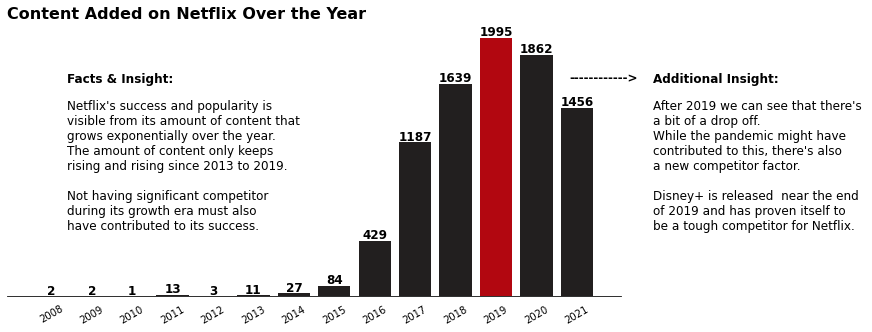

In [44]:
dt_x = df['date_added'].dt.year.value_counts().keys().tolist()
dt_y = df['date_added'].dt.year.value_counts().tolist()

fig, ax = plt.subplots(figsize=(11, 5))
bar_clr = [dr] + (([blk]*(len(dt_x)-1)))

ax.bar(dt_x, dt_y, color= bar_clr)
ax.set_xticks(dt_x)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
# ax.set_ylabel("Content Count", size=11, weight='bold')
ax.set_title("Content Added on Netflix Over the Year", size=16, fontweight='bold', loc='left')

for b in ['top', 'right', 'left']:
    ax.spines[b].set_visible(False)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+15, rect.get_height(), 
            ha='center', fontsize = 12, fontweight='bold')
    
fig.text(0.2, 0.72, "Facts & Insight:", fontsize=12, fontweight='bold')
    
fig.text(0.2, 0.27, '''
Netflix's success and popularity is 
visible from its amount of content that 
grows exponentially over the year. 
The amount of content only keeps 
rising and rising since 2013 to 2019. 

Not having significant competitor
during its growth era must also 
have contributed to its success.
''', fontsize = 12)  

speculation = '''there's also the possibility 
that Netflix has too much content that their 
subscriber can't catch up with everything, 
thus leaving some shows not as succesful 
or as memorable as the one before.'''

fig.text(0.94, 0.72, "Additional Insight:", fontsize=12, fontweight='bold')

fig.text(0.94, 0.27, '''
After 2019 we can see that there's 
a bit of a drop off. 
While the pandemic might have 
contributed to this, there's also 
a new competitor factor.

Disney+ is released  near the end 
of 2019 and has proven itself to 
be a tough competitor for Netflix.
''', fontsize = 12)

fig.text(0.835, 0.68, '''
------------>
''', fontsize = 12, fontweight= 'bold')

ax.tick_params(bottom=False)
ax.set_yticks([])
plt.show()

### 1c) What is the most popular month for Netflix to add new content?

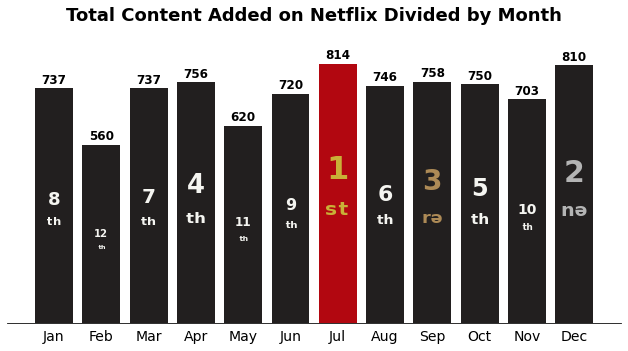

In [45]:
#Additional Color Palette
gld = '#C9B037'
slv = '#B4B4B4'
brz = '#AD8A56'

dt_mx = df['date_added'].dt.month.value_counts().keys().tolist()
dt_my = df['date_added'].dt.month.value_counts().tolist()

fig, ax = plt.subplots(figsize=(11, 5))
# fig, ax = plt.subplots()
bar_clr = [dr] + (([blk]*(len(dt_mx)-1)))

ax.bar(dt_mx, dt_my, color= bar_clr)
mnth_xticks = df['date_added'].dt.month_name().value_counts().keys().str[:3].tolist()
ax.set_xticks(dt_mx)
ax.set_xticklabels(mnth_xticks, fontsize= 14)
ax.set_yticks([])
ax.tick_params(bottom=False)
# ax.set_ylabel("Content Count", size=11, weight='bold')
ax.set_title("Total Content Added on Netflix Divided by Month"
             , size=18, fontweight='bold', loc='center', pad=30)

for b in ['top', 'right', 'left']:
    ax.spines[b].set_visible(False)

suf = ["ₛₜ", "ₙₔ", "ᵣₔ"] + (["ₜₕ"]*len(dt_mx))
clr_s = [gld, slv, brz] + ([wht]*len(dt_mx))
for pos, rect in enumerate(ax.patches):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+15, rect.get_height(), 
            ha='center', fontsize = 12, fontweight='bold')
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() / 2.4, f"{pos+1}\n{suf[pos]}", 
            ha='center', fontsize = 32-(pos*2), fontweight='bold', color= clr_s[pos])
    
plt.show()

As we can see from the graph above:
1. __July__ is Netflix's favorite month to add new content
    -> In US, July is when summer begins

2. __December__ is a close second
    -> December is Christmas and also holiday season everywhere in the world, not just US.

So we can infer that these 2 months is when people has lot of free time on their hands and wants to fill it with some sort of activity, usually entertainment, and Netflix is one of the best sources for it! 

- __For July__, it is perfect for teenager on their summer holiday who wants to binge watch TV Show so they can shake their feeling of FOMO. 
- __For December__, it is also perfect for family time when they don't have anything planned at home. 

With Netflix's wide variety of choices, surely any age group can find the content they want/need whether they want to spend time alone or with family.

### 2a & 2b) What type of content dominates the platform?  What kind of genre dominates the most for each type?

In [46]:
#Movie's Top Genre
mov_filt = df['type'] == 'Movie'
mov_genre = df[mov_filt]['genre']
m_genre = {}
for gs in mov_genre:
    for g in gs.split(","):
        g = g.strip()
        m_genre[g] = m_genre.get(g, 0) + 1
m_genre_sorted = dict(sorted(m_genre.items(), key=lambda x: x[1], reverse=True))
# m_genre_sorted

In [47]:
#TV Show's Top Genre
tv_filt = df['type'] == 'TV Show'
tvs_genre = df[tv_filt]['genre']
tv_genre = {}
for tgs in tvs_genre:
    for tg in tgs.split(","):
        tg = tg.strip()
        tv_genre[tg] =tv_genre.get(tg, 0) + 1
tv_genre_sorted = dict(sorted(tv_genre.items(), key=lambda x: x[1], reverse=True))
# tv_genre_sorted

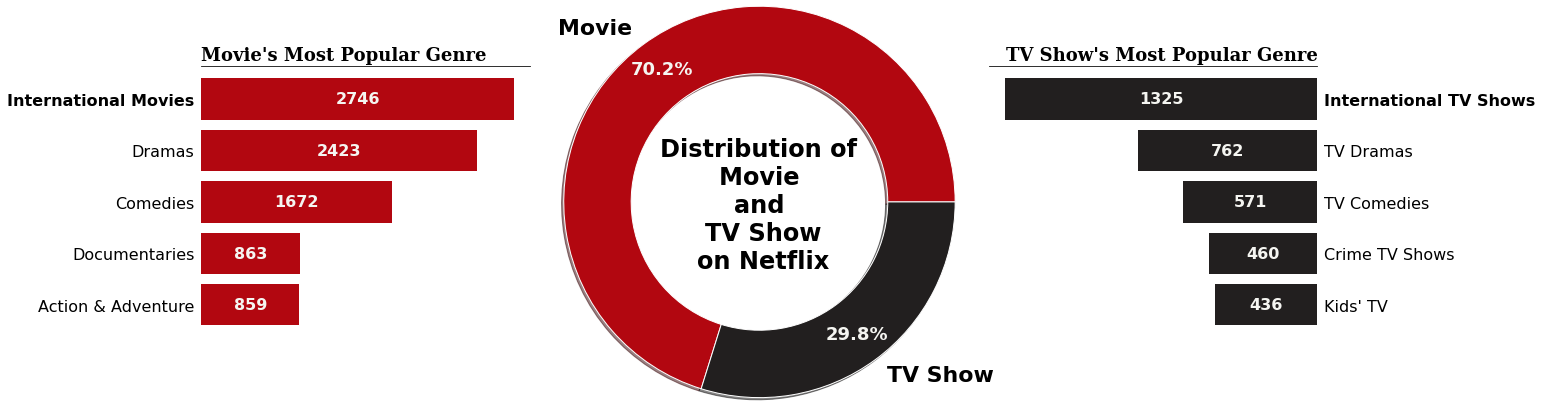

In [48]:
#Pie
type_slice = df['type'].value_counts()
slices_lst = df['type'].value_counts().keys().tolist()
slices = [x for x in slices_lst]
size = 0.62
fig, (ax1,ax,ax2) = plt.subplots(1,3, figsize=(20,5))
patches, texts, autotexts = ax.pie(type_slice, labels=slices, autopct='%1.1f%%', radius=1.8, colors=[dr,blk]
                                   , wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.84, shadow=True
                                   , textprops={'weight':'bold', 'fontsize':22, 'fontfamily':'sans-serif'})
plt.setp(autotexts, color=wht, fontweight='bold', fontsize=18)

fig.text(0.515, 0.32, '''Distribution of 
Movie 
and 
TV Show
on Netflix'''
         , fontsize=24, fontweight='bold', ha='center')

#Bar
mov_gx = [movg for movg in m_genre_sorted.keys()][:5]
mov_gy = [movgc for movgc in m_genre_sorted.values()][:5]
ax1.barh(mov_gx, mov_gy, color=[dr]*len(mov_gx))
ax1.set_xticks([])
ax1.tick_params(axis='y', which='major', labelsize=16, left=False)
ax1.invert_yaxis()
ax1.set_title("Movie's Most Popular Genre", loc='left', fontsize=18, fontweight='bold', fontfamily='serif')
for pos, val in enumerate(mov_gy):
    ax1.annotate(f"{val}", xy=(val-(val*0.5), pos), ha='center', va='center', color=wht, 
                fontweight='bold', fontsize=16)
    
tv_gx = [tvg for tvg in tv_genre_sorted.keys()][:5]
tv_gy = [tvgc for tvgc in tv_genre_sorted.values()][:5]
ax2.barh(tv_gx, tv_gy, color=[blk]*len(tv_gx))
ax2.set_xticks([])
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', which='major', labelsize=16, right=False)
ax2.set_title("TV Show's Most Popular Genre", loc='right', fontsize=18, fontweight='bold', fontfamily='serif')
for pos, val in enumerate(tv_gy):
    ax2.annotate(f"{val}", xy=(val-(val*0.5), pos), ha='center', va='center', color=wht, 
                fontweight='bold', fontsize=16)

ax1.get_yticklabels()[0].set_fontweight('bold')
ax2.get_yticklabels()[0].set_fontweight('bold')

for b in ['right', 'bottom', 'left']:
    ax1.spines[b].set_visible(False)
    ax2.spines[b].set_visible(False)

plt.show()

1. __International (both Movie and TV Show)__ is a tag given for a foreign content. Given this description, it's only natural that most content would have this tag because there are a lot of international content on Netflix. 


2. __Dramas__ is the 2nd most popular genre for Netflix's content. Drama is a neutral genre. All forms of cinema or television that involve fictional stories are forms of drama in the broader sense if their storytelling is achieved by means of actors who represent characters. 
     An action movie or tv show can be a sub-genre for drama, romance can be a sub-genre for drama, fantasy can be a sub-genre for drama, mystery an also be a sub-genre for drama, a lot of other genres can be categorized into drama.
     
      In facts, most watched/popular/talked-about TV Shows on Netflix are drama genre.
    - Squid Game season 1: 1.65 billion hours -> Drama
    - Stranger Things (season 3 + 4): 582.1 million hours + 1.35 billion hours -> Drama
    - Dahmer – Monster: The Jeffrey Dahmer Story: 856.2 million hours -> Thriller, Crime Fiction
    - Money Heist (part 4 + 5): 619 million hours + 792.2 million hours -> Drama
    - Bridgerton (season 1 + 2): 625.5 million hours + 656.2 million hours -> Historical Drama
    - Lucifer season 5: 569.5 million hours -> Comedy Drama
    - All of Us Are Dead season 1: 560.8 million hours -> Korean Drama
    - The Witcher season 1: 541 million hours -> Drama
    - Inventing Anna: 511.9 million hours -> Drama
    - 13 Reasons Why season 2: 496.1 million hours -> Drama
    - Ozark season 4: 491.1 million hours -> Drama

   9 out of 11 on those list are drama series. So, it's not a surprise that Netflix put a lot of drama type content on their database.
    

3. __Comedy__ is one of the most popular genre that people loved to watch. People can always rely on comedy genre to lighten our mood or as a neutral type of genre to watch together with family or friends.


Those 3 genres are the most popular genre shared between the 2 type of contents (Movie & TV Show).

### 2c) How does the duration of shows vary?

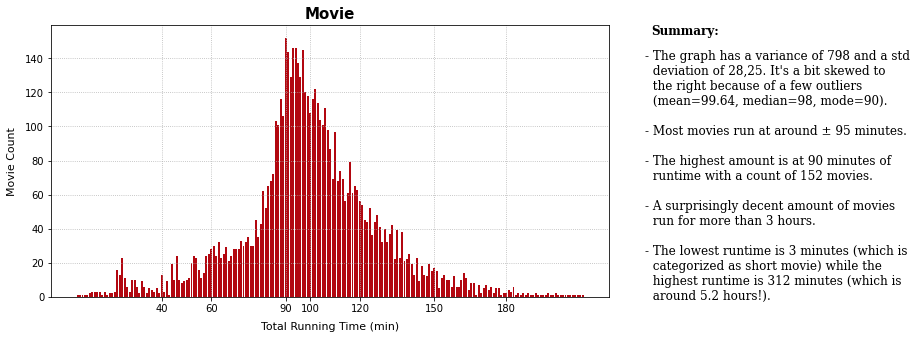

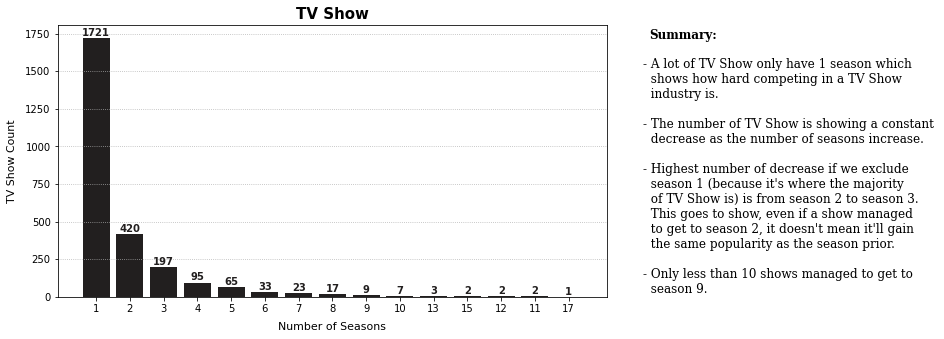

In [77]:
lblsize = 11
lpad = 8

#Movie
mfilt = df['type'] == 'Movie'
keys = df[mfilt]['duration'].value_counts().keys().tolist()
values = df[mfilt]['duration'].value_counts().tolist()
mins_count = dict(zip(keys, values))
mins_count_sorted = dict(sorted(mins_count.items(), key = lambda x: int(x[0].split(" ")[0])))


mrt_x = [x.split(" ")[0] for x in mins_count_sorted.keys()]
mrt_y = mins_count_sorted.values()
fig, ax = plt.subplots(figsize=(10,5))
# d = 5
# clr = ([dr]*d) + ([blk]*d)
ax.bar(mrt_x, mrt_y, color=dr)
ax.set_xticks([34,54,84,94,114,144,173])
ax.set_ylabel("Movie Count", fontsize=lblsize, labelpad=lpad)
ax.set_xlabel("Total Running Time (min)", fontsize=lblsize, labelpad=lpad)
ax.set_title("Movie", fontweight='bold', fontsize=15)
plt.grid(axis='both', linestyle=':')

fig.text(0.959, 0.81, '''
Summary:
'''
         , fontsize=12, fontweight='bold',  fontfamily='serif')

fig.text(0.95, 0.075, '''
- The graph has a variance of 798 and a std
  deviation of 28,25. It's a bit skewed to 
  the right because of a few outliers 
  (mean=99.64, median=98, mode=90).

- Most movies run at around ± 95 minutes.
  
- The highest amount is at 90 minutes of 
  runtime with a count of 152 movies.

- A surprisingly decent amount of movies
  run for more than 3 hours.

- The lowest runtime is 3 minutes (which is  
  categorized as short movie) while the 
  highest runtime is 312 minutes (which is 
  around 5.2 hours!).
'''
         , fontsize=12, fontweight='light',  fontfamily='serif')

# mov = pd.DataFrame({'minutes':movdata})
# mov.describe().applymap('{:.2f}'.format)
# mov.aggregate(['sum', 'median', 'var', 'sem', 'mad', 'prod']).applymap('{:.2f}'.format)

#TV Show
tvsfilt = df['type'] == 'TV Show'
tvsval = df[tvsfilt]['duration'].value_counts()
durx = [x.split(" ")[0] for x in tvsval.keys()]
dury = tvsval.values
fig, ax = plt.subplots(figsize = (9.85,5))
ax.bar(durx, dury, color=[blk]*len(durx))
ax.set_title('TV Show', fontweight='bold', fontsize=15)
ax.set_ylabel('TV Show Count', fontsize=lblsize, labelpad=lpad)
ax.set_xlabel('Number of Seasons', fontsize=lblsize, labelpad=lpad)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+15, rect.get_height(), 
            ha='center', fontsize = 10, fontweight='bold', color=blk)

fig.text(0.959, 0.8, '''
Summary:
'''
         , fontsize=12, fontweight='bold',  fontfamily='serif')

fig.text(0.95, 0.095, '''
- A lot of TV Show only have 1 season which 
  shows how hard competing in a TV Show 
  industry is.
  
- The number of TV Show is showing a constant 
  decrease as the number of seasons increase.
  
- Highest number of decrease if we exclude
  season 1 (because it's where the majority 
  of TV Show is) is from season 2 to season 3. 
  This goes to show, even if a show managed 
  to get to season 2, it doesn't mean it'll gain 
  the same popularity as the season prior.

- Only less than 10 shows managed to get to
  season 9.
'''
         , fontsize=12, fontweight='light',  fontfamily='serif')

# tvdata = []
# for dur in df['duration']:
#     show = (dur.split(" ")[1]).strip()
#     if show.startswith("Season") or show.startswith("Seasons"):
#         num_mins = int(dur.split(" ")[0])
#         tvdata.append(num_mins)
# len(tvdata)

plt.grid(axis='y', linestyle=':')
plt.show()

### 2d) Is there any correlation between duration and genre that dominates? (both TV Show and Movie separately)

##### TV Show

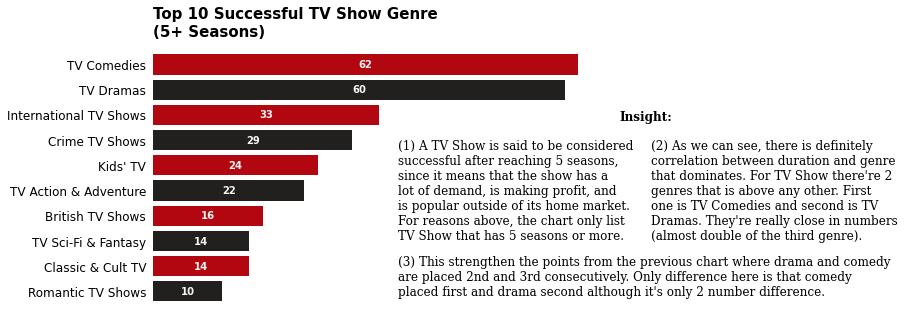

In [50]:
fivesplus = []
for idx, seasons in enumerate(df['duration']):
    num_season = int(seasons.split(" ")[0])
    show = seasons.split(" ")[1]
    if num_season >= 5 and (show.startswith("Seasons") or show.startswith("Season")):
        fivesplus.append((idx, df.loc[idx, 'title']))

fivesplus_c = {}
for titles in fivesplus:
    for genres in [df.loc[titles[0], 'genre']]:
        for genre in genres.split(","):
            g = genre.strip()
            fivesplus_c[g] = fivesplus_c.get(g, 0) + 1
fivesplus_c_sorted = dict(sorted(fivesplus_c.items(), key = lambda x: x[1], reverse=True))

fsx = [x for x in fivesplus_c_sorted.keys()][:10]
fsy = [x for x in fivesplus_c_sorted.values()][:10]

fig, ax = plt.subplots(figsize=(8,5))
ax.barh(fsx, fsy, color = [dr, blk])
ax.invert_yaxis()
ax.set_xticks([])
# ax.invert_xaxis() #mirror position
# ax.yaxis.set_label_position("right") #mirror position
# ax.yaxis.tick_right() #mirror position
ax.tick_params(bottom=False, left=False, labelsize=12)
ax.set_title("Top 10 Successful TV Show Genre\n(5+ Seasons)", weight='bold', size=15, loc='left')
for pos, val in enumerate(fsy):
    ax.annotate(f"{val}", xy=(val-(val*0.5), pos), ha='center', va='center', color=wht, 
                fontweight='bold', fontsize=10)
for b in ['right', 'top', 'left', 'bottom']:
    ax.spines[b].set_visible(False)

fig.text(0.935, 0.62, '''
Insight:
'''
         , fontsize=12, fontweight='bold',  fontfamily='serif')

fig.text(0.55, 0.29,'''
(1) A TV Show is said to be considered 
successful after reaching 5 seasons, 
since it means that the show has a 
lot of demand, is making profit, and 
is popular outside of its home market.
For reasons above, the chart only list 
TV Show that has 5 seasons or more.
'''
        , fontsize=12, fontweight='light',  fontfamily='serif')

fig.text(.99, 0.29, '''
(2) As we can see, there is definitely 
correlation between duration and genre 
that dominates. For TV Show there're 2 
genres that is above any other. First 
one is TV Comedies and second is TV 
Dramas. They're really close in numbers
(almost double of the third genre).
'''
         , fontsize=12, fontweight='light',  fontfamily='serif')

fig.text(0.55, 0.135, '''
(3) This strengthen the points from the previous chart where drama and comedy 
are placed 2nd and 3rd consecutively. Only difference here is that comedy
placed first and drama second although it's only 2 number difference.
'''
         , fontsize=12, fontweight='light',  fontfamily='serif')

plt.show()

##### Movie

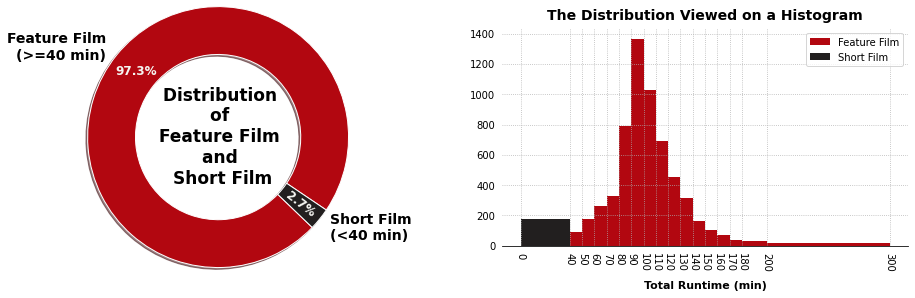

In [51]:
ff = "Feature Film\n(>=40 min)"
sf = "Short Film\n(<40 min)"
min_cat = {}
for mins in df['duration']:
    mins = mins.split(" ")
    unit = mins[1].strip() 
    if unit.startswith("min") or unit.startswith("mins"):
        mint = int(mins[0].strip())
        if mint < 40:
            min_cat[sf] = min_cat.get(sf, 0) + 1
        elif mint >= 40:
            min_cat[ff] = min_cat.get(ff, 0) + 1
            
fig, (ax,ax2) = plt.subplots(1,2, figsize=(16,4))
slices_keys = min_cat.keys()
slices_val = min_cat.values()
slices = [x for x in slices_keys]
size = 0.55

patches, texts, autotexts = ax.pie(slices_val, labels=slices, autopct='%1.1f%%', radius=1.5, colors=[dr,blk]
                                   , wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.81, shadow=True
                                   , textprops={'weight':'bold', 'fontsize':14, 'fontfamily':'sans-serif'}
                                  , startangle = -34)
plt.setp(autotexts[1], color=wht, fontweight='bold', fontsize=12, rotation=-38)
plt.setp(autotexts[0], color=wht, fontweight='bold', fontsize=12, rotation=0)

fig.text(0.305, 0.27, '''
Distribution 
of 
Feature Film 
and 
Short Film
'''
         , fontsize=17, fontweight='bold', ha='center')

movdata = []
for dur in df['duration']:
    show = (dur.split(" ")[1]).strip()
    if show.startswith("min") or show.startswith("mins"):
        num_mins = int(dur.split(" ")[0])
        movdata.append(num_mins)

h_sf = [x for x in movdata if x <= 40]
h_ff = [x for x in movdata if x > 40]
bins = [0,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,200,300]

ax2.hist(h_ff, bins=bins, color=[dr], label='Feature Film')
ax2.hist(h_sf, bins=[0,40], color=[blk], label= 'Short Film')
ax2.set_xticks(bins)
ax2.set_xticklabels(ax2.get_xticks(), rotation=270)
ax2.set_title("The Distribution Viewed on a Histogram", weight='bold', size=14, va='bottom')
ax2.tick_params(axis='both', which='major', labelsize=10, left=False, bottom=False)
ax2.set_xlabel("Total Runtime (min)", labelpad=9, fontsize=11, weight='bold')

for b in ['right', 'left', 'top']:
    ax2.spines[b].set_visible(False)
    
# fig.text(0.66, 0.16, min_cat[ff], color=wht, fontweight='bold', fontsize=12)
# fig.text(0.576, 0.16, min_cat[sf], color=wht, fontweight='bold', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle=':')
plt.show()

Unfortunately for movie, duration can't really be a metric for success. For TV Show the duration data is presented in season so it can be a decent indicator, but for movie a longer runtime doesn't always equal success. Since duration can't be a metric for success, __we don't have a way of filtering what counts as a successful genre here in movie category.__

That said, we can still take a look at the chart above just for reference. According to Yale University Library website, a movie with less than 40 minutes running time is considered a __'Short Film'__ and a full length films with a running time of 40 minutes or more is called __'Feature Film'__ so I divided the category to those 2 part.

The result is shown on chart above, the black colored bar on histogram represent the short film while the rest is feature film. From the histogram presented above you can see the overwhelming difference between short film and feature film plus some other fact:
- The total number for short movie doesn't even reach 200 (the total movie on this dataset is 6114).
- Unlike the previous chart, here we can clearly see that 90-100 minute category has the most amount of film.
- The second most popular running time range is 100-110 minutes and third is 80-90 minutes.
- Movie with more than 2.5 hours of running time is a minority (it's within 2 standard deviation of the mean). 

### 3a & 3b) Which (maturity) rating has the most amount on both type of content? Does that reflects Netflix's target audience?

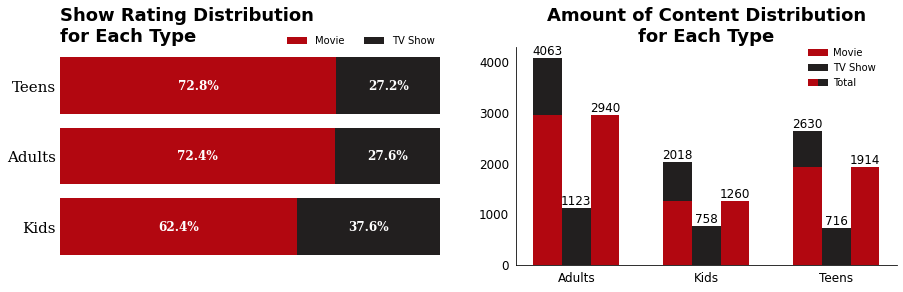

In [52]:
#Conversion
mr = {'TV-MA': 'Adults',
     'TV-14': 'Teens',
     'R': 'Adults',
     'TV-PG': 'Kids',
     'PG-13': 'Teens',
     'PG': 'Kids',
     'TV-Y7': 'Kids',
     'TV-G': 'Kids',
     'TV-Y': 'Kids',
     'NR': 'Adults',
     'G': 'Kids',
     'TV-Y7-FV': 'Kids',
     'NC-17': 'Adults',
     'UR': 'Adults'}

df['age_rating'] = df['rating']
df['age_rating'] = df['age_rating'].map(mr)
type_grp = df.groupby('type')
# type_grp['age_rating'].value_counts()

#Visualization
pivot_r = type_grp['age_rating'].value_counts().unstack(level=0)
pivot_r['sum'] = pivot_r.sum(axis=1)
pivot_ratio = (pivot_r.T / pivot_r['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
fig, (ax, ax2) = plt.subplots(1,2, figsize = (15,4))

ax.barh(pivot_ratio.index, pivot_ratio['Movie'], color=dr, label='Movie')
ax.barh(pivot_ratio.index, pivot_ratio['TV Show'], left=pivot_ratio['Movie'], color=blk, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks(pivot_ratio.index)
ax.set_yticklabels(pivot_ratio.index, fontfamily='serif', fontsize=11)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.legend(ncol=2, loc='upper right', bbox_to_anchor=(1.01, 1.095), frameon=False)
ax.set_title("Show Rating Distribution\nfor Each Type", size=18, loc='left', weight='bold')

for b in ['top', 'left', 'right', 'bottom']:
    ax.spines[b].set_visible(False)

for i in pivot_ratio.index:
    ax.annotate(f"{pivot_ratio['Movie'][i]*100:.3}%", 
                   xy=(pivot_ratio['Movie'][i]/2, i),
                   va = 'center', ha= 'center',fontsize= 12, fontweight= 'bold', fontfamily= 'serif',
                   color= 'white')   
    
for i in pivot_ratio.index:
    ax.annotate(f"{pivot_ratio['TV Show'][i]*100:.3}%", 
                   xy=(pivot_ratio['Movie'][i] + pivot_ratio['TV Show'][i]/2, i),
                   va = 'center', ha= 'center',fontsize= 12, fontweight= 'bold', fontfamily= 'serif',
                   color= 'white')

grp_x = pivot_r['Movie'].keys()
ind = np.arange(len(grp_x))
width = 0.22

rects1 = ax2.bar(ind+width+width, pivot_r['Movie'].values.tolist(), width, label='Movie', color=dr)
rects2 = ax2.bar(ind+width, pivot_r['TV Show'].values.tolist(), width, label='TV Show', color=blk)
rects3 = ax2.bar(grp_x, pivot_r['Movie'].values.tolist(), width, label='Total', color=dr)
rects4 = ax2.bar(grp_x, pivot_r['TV Show'].values.tolist(), width, bottom=pivot_r['Movie'].values.tolist(), color=blk)

ax2.set_yticks([x for x in range(0, 5000, 1000)])
ax2.set_yticklabels([x for x in range(0, 5000, 1000)])
ax2.tick_params(left=False, axis='y', which='major', labelsize=12)
ax2.tick_params(bottom=False)
ax2.set_xticks(ind + width)
ax2.set_xticklabels(grp_x, fontsize=12)
# ax2.legend(loc='upper right', bbox_to_anchor=(0.97, 1.04), frameon=False)
ax2.set_title('Amount of Content Distribution\nfor Each Type', size=18, loc='center', weight='bold')

ax2.bar_label(rects1, padding=0.5, fontsize=12)
ax2.bar_label(rects2, padding=0.5, fontsize=12)
ax2.bar_label(rects4, padding=0.5, fontsize=12)

#Legend_Left
m1 = Patch(facecolor=dr) #movie left
tv1 = Patch(facecolor=blk) #tv show left
tot1 = Patch(facecolor=dr) #total left
#Legend Right
m2 = Patch(facecolor=dr) #movie right
tv2 = Patch(facecolor=blk) #tv show right
tot2 = Patch(facecolor=blk) #total right

ax2.legend(handles=[m1, tv1, tot1, m2, tv2, tot2],
          labels=['', '', '', 'Movie', 'TV Show', 'Total'],
          ncol=2, handletextpad=0.5, handlelength=1, columnspacing=-0.5, loc='upper right'
          , bbox_to_anchor=(0.97, 1.04), frameon=False)

for b in ['top', 'right']:
    ax2.spines[b].set_visible(False)
    
plt.show()

By looking at Netflix's content show rating, we can roughly infer what their target audiences are. I grouped the show rating into 3 different categories based on Netflix's maturity rating. 

__1. Adults__
- R : Restricted. May be inappropriate for ages under 17
- TV-MA : For Mature Audiences
- NC-17 : Inappropriate for ages 17 and under
- NR : Not Rated. A film that has not been submitted for a rating or is an uncut version of a film that was submitted
- UR : Unrated. Similiar to NR, the two terms are used interchangeably 


__2. Teens__
- PG-13 : Parents strongly cautioned. May be inappropriate for ages under 13
- TV-14 : Parents strongly cautioned. May not be suitable for ages under 14


__3. Kids__
- TV-PG : Parental Guidance suggested
- PG : Parental Guidance suggested
- G : Suitable for General Audiences
- TV-G : Suitable for General Audiences
- TV-Y : Designed to be appropriate for all children
- TV-Y7 : Suitable for ages 7 and up
- TV-Y7-FV : The FV stands for Fantasy Violence. This is used to indicate that a TV-Y7-rated program contains behavior that, while violent and often combative, is fictional and can be shown to children who understand the difference between fantasy and reality.

We can see from the graph above that most content on Netflix are Movies as we already know from the graph before this. It turns out this holds true for every rating category on Netflix. Although the comparison percentage (between movie and tv show) for teens and adults looked similiar, the amount of content that the adult rating has is almost doubled to that of teens and more than double to that of kids category. So we can conclude that Netflix's target audiences are mostly adults aged 17+.

### 4) Which country has the most content?

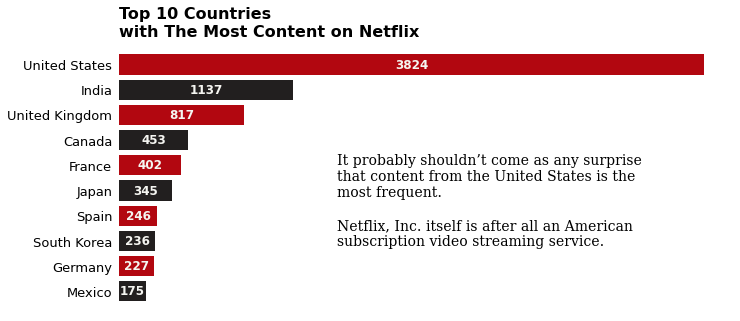

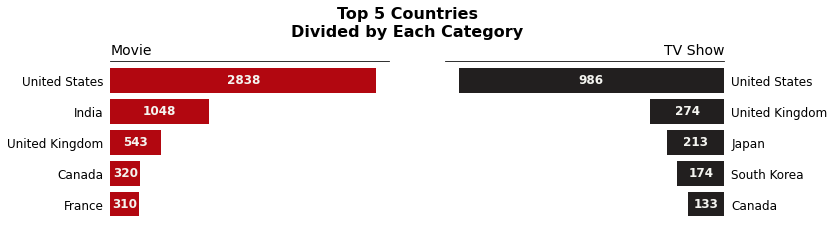

In [53]:
country_count = {}
for countries in df['country']:
    if type(countries) != float:
        for country in countries.split(","):
            country = country.strip()
            if country != '' and country != missing_msg:
                country_count[country] = country_count.get(country, 0) + 1
country_count_sorted = dict(sorted(country_count.items(), key=lambda x: x[1], reverse=True))

ctry_x = [ctry for ctry in country_count_sorted.keys()][:10]
ctry_y = [ctry_count for ctry_count in country_count_sorted.values()][:10]

fig, ax = plt.subplots(1,1, figsize = (11,5))

ax.barh(ctry_x, ctry_y, color =[dr, blk]*len(ctry_x))
for pos, val in enumerate(ctry_y):
    ax.annotate(f"{val}", xy=(val-(val*0.5), pos), ha='center', va='center', color=wht, 
                fontweight='bold', fontsize=12)
    
ax.set_title("Top 10 Countries\nwith The Most Content on Netflix", size=16, loc='left', weight='bold')
# ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=13, left=False)
ax.set_xticks([])
ax.invert_yaxis()
for b in ['top', 'right', 'bottom', 'left']:
    ax.spines[b].set_visible(False)

fig.text(0.4, 0.27, '''
It probably shouldn’t come as any surprise 
that content from the United States is the 
most frequent. 

Netflix, Inc. itself is after all an American 
subscription video streaming service.
'''
         , fontsize=14, fontweight='light',  fontfamily='serif')

#TV Show only Country 
tv_filt = df['type'] == 'TV Show'
tvs_country = df[tv_filt]['country']
tv_country = {}
for tcs in tvs_country:
    for tc in tcs.split(","):
        tc = tc.strip()
        if tc != missing_msg:
            tv_country[tc] =tv_country.get(tc, 0) + 1
tv_country_sorted = dict(sorted(tv_country.items(), key=lambda x: x[1], reverse=True))


#Movie only Country 
mov_filt = df['type'] == 'Movie'
movs_country = df[mov_filt]['country']
mov_country = {}
for mcs in movs_country:
    for mc in mcs.split(","):
        mc = mc.strip()
        if mc != missing_msg:
            mov_country[mc] =mov_country.get(mc, 0) + 1
mov_country_sorted = dict(sorted(mov_country.items(), key=lambda x: x[1], reverse=True))

mctry_x = [ctry for ctry in mov_country_sorted.keys()][:5]
mctry_y = [ctry_count for ctry_count in mov_country_sorted.values()][:5]

tvctry_x = [ctry for ctry in tv_country_sorted.keys()][:5]
tvctry_y = [ctry_count for ctry_count in tv_country_sorted.values()][:5]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11,3))

ax1.barh(mctry_x, mctry_y, color=[dr]*len(mctry_x))
ax1.set_title("Movie", size=14, loc='left')
ax1.invert_yaxis()
ax1.tick_params(axis='y', which='major', labelsize=12, left=False)
ax1.set_xticks([])
for pos, val in enumerate(mctry_y):
    ax1.annotate(f"{val}", xy=(val-(val*0.5), pos), ha='center', va='center', color=wht, 
                fontweight='bold', fontsize=12)

ax2.barh(tvctry_x, tvctry_y, color=[blk]*len(mctry_x))
ax2.set_title("TV Show", size=14, loc='right')
ax2.invert_yaxis()
ax2.invert_xaxis() #mirror position
ax2.yaxis.set_label_position("right") #mirror position
ax2.yaxis.tick_right() #mirror position
ax2.tick_params(axis='y', which='major', labelsize=12, right=False)
ax2.set_xticks([])
for pos, val in enumerate(tvctry_y):
    ax2.annotate(f"{val}", xy=(val-(val*0.5), pos), ha='center', va='center', color=wht, 
                fontweight='bold', fontsize=12)
    
for b in ['right', 'bottom', 'left']:
    ax1.spines[b].set_visible(False)
    ax2.spines[b].set_visible(False)

sup_xr = 0.9
sup_yr = 1.01
fig.suptitle("Top 5 Countries\nDivided by Each Category", fontweight='bold', fontsize='16'
             , va='bottom', ha='center')

plt.show()

1. __US__ came first as country with most content available on Netflix even when the category is split
2. __India__ is second for country with the most content even on movie category. It's not that surprising as Bollywood is by far the largest film industry in the world in terms of number of films produced. But the same thing cannot be said for TV Show, India isn't even on top 5 list for TV Show category. 
3. __UK__ is third for the most content overall and on Movie, but is second ranked for TV Show category. The gap is quite far between 1st place and 2nd place for TV Show but not as far against 3rd.
4. __Canada__ is in the 4th spot for overall and movie category, but is 5th on TV Show.
5. __France__ sits at 5th on overall and movie category and isn't even top 5 on TV Show.

Most top 5 for remains almost identical even when the category is split, only ranking varies. The only difference is 4th place for TV Show which is occupied by __South Korea__ who is 8th on overall content ranking. Lately, K-Dramas grow bigger audiences around the world so it only make sense that Netflix also started to make those show available on their platform. 

### 5a & 5b & 5c) Which actor/actress shows up most frequently? What about director? Which one shows up most frequently? Is there any correlation between the two (actor and director)? 

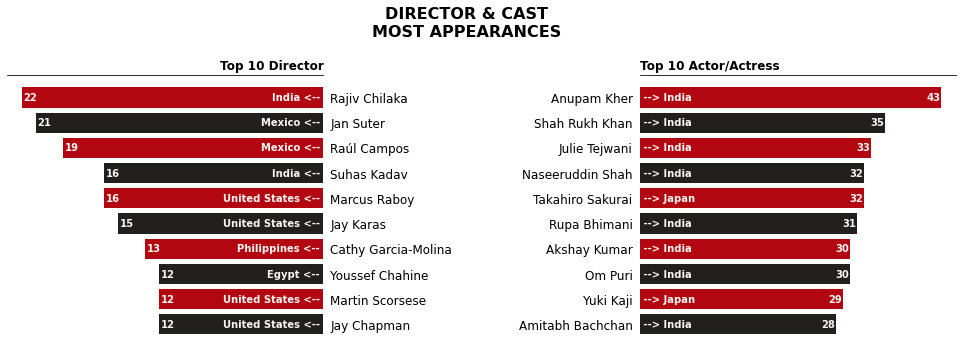

In [54]:
director_count = {}
for directs in df['director']:
    if type(directs) != float:
        for direct in directs.split(","):
            dir_s = direct.strip()
            if dir_s != missing_msg:
                director_count[dir_s] = director_count.get(dir_s, 0) + 1
dir_count_sorted = dict(sorted(director_count.items(), key=lambda x: x[1], reverse=True))

cast_count = {}
for casts in df['cast']:
    if type(casts) != float:
        for cast in casts.split(","):
            cast = cast.strip()
            if cast != missing_msg:
                cast_count[cast] = cast_count.get(cast, 0) + 1
cast_count_sorted = dict(sorted(cast_count.items(), key=lambda x: x[1], reverse=True))

fig, (ax2, ax1) = plt.subplots(1, 2, figsize = (17,5))

cast_x = [cast for cast in cast_count_sorted][:10]
cast_y = [cast_num for cast_num in cast_count_sorted.values()][:10]

ax1.barh(cast_x, cast_y, color=[dr, blk]*len(cast_x))
ax1.set_xticks([])
ax1.tick_params(axis='y', which='major', labelsize=12, left=False)
ax1.invert_yaxis() #same as reverse list
ax1.set_title("Top 10 Actor/Actress", loc='left', fontweight='bold')
for pos, val in enumerate(cast_y):
    ax1.annotate(f"{val}", xy=(val-0.1, pos), ha='right', va='center', color=wht, fontweight='bold')
    ax1.annotate(f" --> {search_cast_country(cast_x[pos])}", xy=(val-val, pos)
                 , ha='left', va='center', color=wht, fontweight='bold')
    
dir_x = [dirctr for dirctr in dir_count_sorted][:10]
dir_y = [dir_num for dir_num in dir_count_sorted.values()][:10]

ax2.barh(dir_x, dir_y, color=[dr, blk]*len(dir_x))
ax2.set_xticks([])
ax2.invert_yaxis() #same as reverse list
ax2.invert_xaxis() #mirror position
ax2.yaxis.set_label_position("right") #mirror position
ax2.yaxis.tick_right() #mirror position
ax2.tick_params(axis='y', which='major', labelsize=12, right=False)
ax2.set_title("Top 10 Director", loc='right', fontweight='bold')
for pos, val in enumerate(dir_y):
    ax2.annotate(f"{val}", xy=(val-0.1, pos), ha='left', va='center', color=wht, fontweight='bold')
    ax2.annotate(f"{search_dir_country(dir_x[pos])} <-- ", xy=(val-val, pos)
                 , ha='right', va='center', color=wht, fontweight='bold')

for b in ['right', 'bottom', 'left']:
    ax1.spines[b].set_visible(False)
    ax2.spines[b].set_visible(False)

fig.suptitle("DIRECTOR & CAST\nMOST APPEARANCES", fontweight='bold', fontsize='16', va='bottom')
plt.subplots_adjust(wspace=1)
plt.show()

1. __The Director__ ranking consists of:
    - 4 from US, 
    - 2 from India, 
    - 2 from Mexico,
    - 1 from Philiphines and 
    - 1 from Egypt.
    
    
2. __The Cast__ ranking consists of: 
    - 8 from India and 
    - 2 from Japan. 

Unlike the complete country data (after processed), the director and cast's missing data had to be filled with 'Data Not Available' since they contain name data (something that can't easily be predicted).

4 Director from US isn't a surprise at all since we already knew from the previous graph that US tops the ranking for most content on Netflix's database. 

8 Actor/Actress from India is quite a surprise since India is nowhere to be found within the top 5 ranking for TV Show. This probably just shows that India tends to use the same (popular) actor/actress frequently while US casting list is more variative.

__The only correlation I can see between director chart and cast chart is that they're both topped by India__. Again, it's probably because the variability of the top movie's director and actor/actress in India is low.

### 5d) Which actor - director pairing shows up the most?

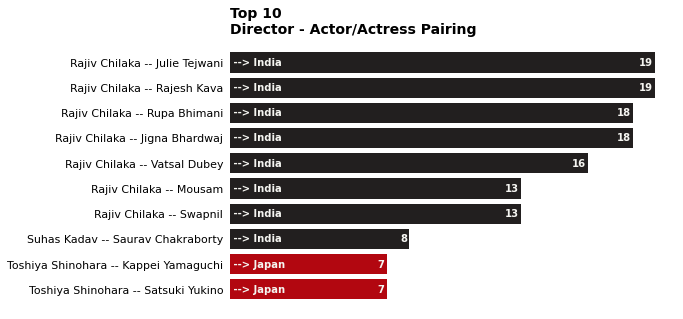

In [55]:
dir_cast_pair = {}
for idx, dirs in enumerate(df['director']):
    if (dirs != missing_msg) & (df.loc[idx, 'cast'] != missing_msg):
        for director in dirs.split(","):
            director = director.strip()
            for casts in [df.at[idx, 'cast']]:
                for cast in casts.split(","):
                    cast = cast.strip()
                    dir_cast_pair[f"{director} -- {cast}"] = dir_cast_pair.get(f"{director} -- {cast}", 0) + 1
dcpair_sorted = dict(sorted(dir_cast_pair.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(8,5))

pair_x = [pair for pair in dcpair_sorted][:10]
pair_y = [pair_num for pair_num in dcpair_sorted.values()][:10]

ax.barh(pair_x, pair_y, color=([blk]*8) + [dr]*2)
ax.set_xticks([])
ax.tick_params(axis='y', which='major', labelsize=11, left=False)
ax.invert_yaxis() #same as reverse list
ax.set_title("Top 10\nDirector - Actor/Actress Pairing", loc='left', fontweight='bold', fontsize=14)
for pos, val in enumerate(pair_y):
    ax.annotate(f"{val}", xy=(val-0.1, pos), ha='right', va='center', color=wht, fontweight='bold')
    ax.annotate(f" --> {search_dir_country(pair_x[pos].split('--')[0].strip())}", xy=(val-val, pos)
                 , ha='left', va='center', color=wht, fontweight='bold')
for b in ['right', 'bottom', 'left', 'top']:
    ax.spines[b].set_visible(False)
    
plt.show()

- Similiar to the top ranking for most actor/actress cast, this pairing ranking is dominated by India (8 pairings, black colored bar) and 2 from Japan (red colored bar).
- This strengthen the point from the previous graph even more that India tends to use the same director and/or actor/actress for their movie/show.

### ------------------------------------------------------------- End of Analysis -------------------------------------------------------------

## Conclusion

1. 
    - How does the amount of content on Netflix grow over the year? __Exponentially (it keeps rising till 2020)__.
    - What year did Netflix add the most content on its platform? __2019__.
    - What is the most popular month for Netflix to add new content? __July and December__.
2. 
    - What type of content dominates the platform? __Movie. The ratio is 2.35:1 against TV Show__.
    - What kind of genre dominates the most? __International, Drama and Comedy__.
    - How does the duration of shows vary? __For Movie: normally distributed. For TV show: a constant decrease in number each time the number of seasons increase__.
    - Is there any correlation between duration and genre that dominates? __Yes for TV Show. No for Movie__.
3. 
    - Which (maturity) rating has the most amount on both type of content? __Adult (R, TV-MA, NC-17, NR, UR)__.
    - Does that reflects Netflix's target audience? __Yes__.
4. Which country has the most content? __United States__.
5. 
    - Which actor/actress shows up most frequently? __Anupam Kher from India__.
    - What about director? Which one shows up most frequently? __Rajiv Chilaka from India__.
    - Is there any correlation between the two (actor and director)? __Yes, they're both from India__.
    - Which actor - director pairing shows up the most? __Rajiv Chilaka - Julie Tejwani. Both from India__.

## Thank you for reading, have a great day!